# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [182]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
import warnings
warnings.filterwarnings("ignore")

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
# Combine the data into a single dataset & preview it
combined_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
combined_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [183]:
# Checking the number of mice.
print(len(combined_df["Mouse ID"].unique()))
print(len(combined_df["Mouse ID"]))
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dups = combined_df.loc[combined_df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
# Optional: Get all the data for the duplicate mouse ID. 
all_dups =pd.DataFrame(dups)
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined__df[combined__df['Mouse ID'].isin(dups)==False]
clean_df


249
1893


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [184]:
# Checking the number of mice in the clean DataFrame.
print(len(clean_df["Mouse ID"].unique()))
print(len(clean_df["Mouse ID"]))


248
1880


## Summary Statistics

In [185]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Assemble the resulting series into a single summary DataFrame.

regimen_mean = clean_df.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
regimen_mean

regimen_median = clean_df.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
regimen_median

regimen_variance = clean_df.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
regimen_variance

regimen_std = clean_df.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
regimen_std

regimen_sem = clean_df.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]
regimen_sem

summary = pd.DataFrame({"Mean": regimen_mean, "Median":regimen_median, "Variance":regimen_variance, "Standard Deviation": regimen_std, "SEM": regimen_sem})

summary

summary.to_csv("fileOne.csv", index=False, header=True)


In [186]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.
single_df = clean_df.groupby('Drug Regimen')
summary2 = single_df.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
summary2


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

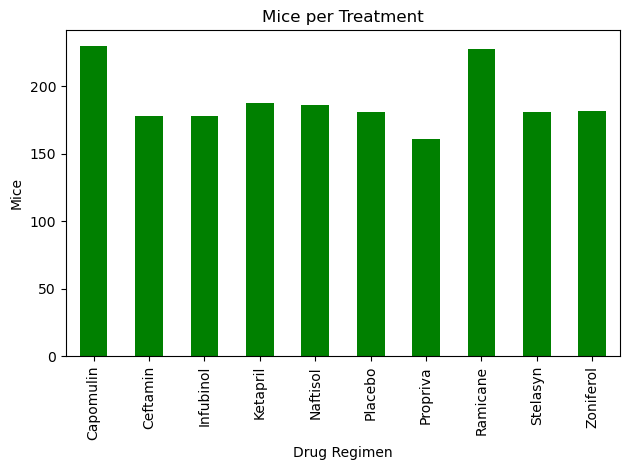

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

In [187]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
chart_df = combined_df.groupby(["Drug Regimen"]).count()["Mouse ID"] 


plot_pandas = chart_df.plot.bar(color='g')
chart_df
plt.xlabel("Drug Regimen")
plt.ylabel("Mice")
plt.title("Mice per Treatment")

#plt.savefig("../Images/Pan_mice_per_treat.png", bbox_inches = "tight")
plt.tight_layout()
plt.show()

chart_df


Text(0, 0.5, 'Mice')

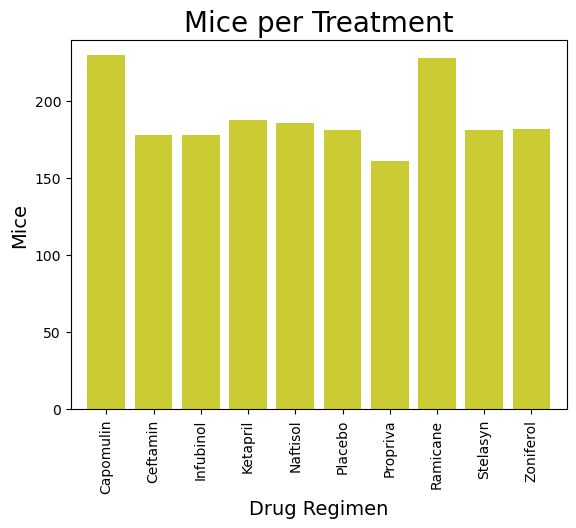

In [188]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
mice_list =(combined_df.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()
mice_list

x_axis = np.arange(len(mice_list))

plt.bar(x_axis, mice_list, color='y', alpha=0.8, align='center')

tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(mice_list)+10)

plt.title("Mice per Treatment",fontsize = 20)
plt.xlabel("Drug Regimen",fontsize = 14)
plt.ylabel("Mice",fontsize = 14)

#plt.savefig("../Images/mat_mice_per_treat.png", bbox_inches = "tight")

        Total Count Percentage of Sex
Sex                                  
Female          124            49.80%
Male            125            50.20%


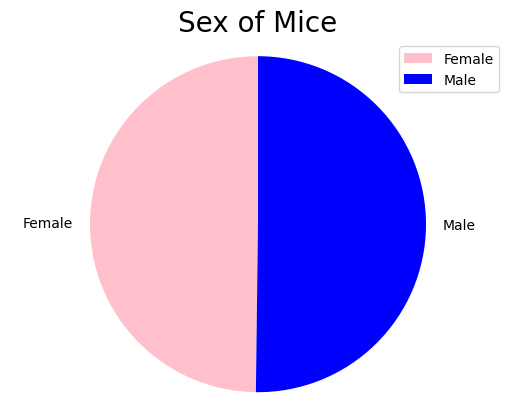

In [189]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender = combined_df.groupby(["Mouse ID","Sex"])
gender
gender_df = pd.DataFrame(gender.size())

mice_gender = pd.DataFrame(gender_df.groupby(["Sex"]).count())
mice_gender.columns = ["Total Count"]

# create and format the percentage of female vs male
mice_gender["Percentage of Sex"] = ((mice_gender["Total Count"]/mice_gender["Total Count"].sum()))
mice_gender['Percentage of Sex'] = mice_gender['Percentage of Sex'].astype(float).map("{:.2%}".format)
print(mice_gender)

colors = ['pink', 'blue']
explode = (0.1, 0)
plot = mice_gender.plot.pie(y='Total Count', colors = colors, startangle=90)

plt.title('Sex of Mice',fontsize = 20)
plt.axis("equal")
plt.ylabel('')

#plt.savefig("../Images/pi_pandas.png", bbox_inches = "tight")
plt.show()

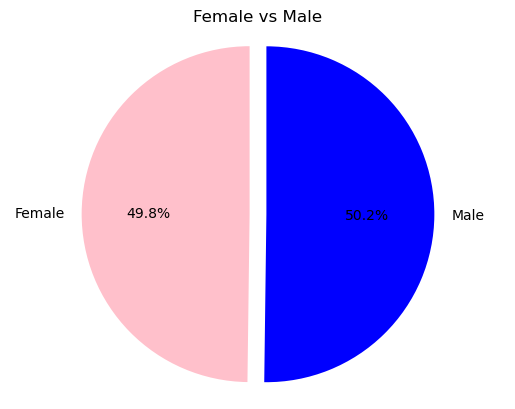

In [190]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Female","Male"]

#List the values of each section of the pie chart
sizes = [49.79,50.20]

#Set colors for each section of the pie
colors = ['pink', 'blue']

#Determoine which section of the circle to detach
explode = (0.1, 0)

#Create the pie chart based upon the values 
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct="%1.1f%%",  startangle=90,)
plt.title('Female vs Male')
plt.ylabel('')
#Set equal axis
plt.axis("equal")

#plt.savefig("../Images/pi_plot.png", bbox_inches = "tight")
plt.show()


## Quartiles, Outliers and Boxplots

In [191]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

timepoint = combined_df.groupby(["Mouse ID"])["Timepoint"].max()
timepoint = timepoint.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last = timepoint.merge(combined_df, on=["Mouse ID", "Timepoint"], how="left")
last



,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [192]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
vol = []
for drug in treatments:
    tumor_vol = last.loc[last["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    vol.append(tumor_vol)
    quartiles = tumor_vol.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq   
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    print(f"The outliers for {drug} are: {outliers}")
    

The outliers for Capomulin are: Series([], Name: Tumor Volume (mm3), dtype: float64)
The outliers for Ramicane are: Series([], Name: Tumor Volume (mm3), dtype: float64)
The outliers for Infubinol are: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
The outliers for Ceftamin are: Series([], Name: Tumor Volume (mm3), dtype: float64)


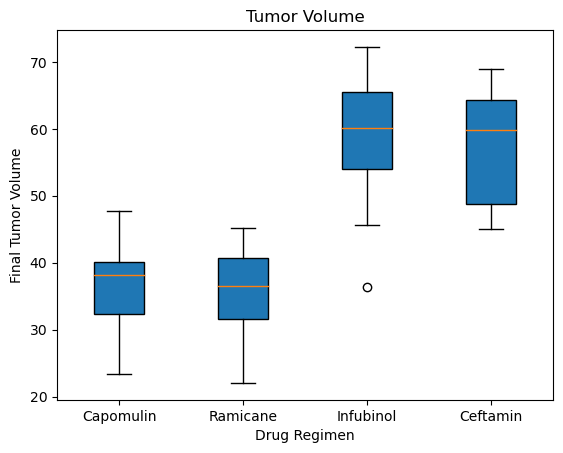

In [193]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume')
ax1.set_ylabel('Final Tumor Volume')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(vol, labels=treatments, widths = 0.4, patch_artist=True,vert=True)

#plt.savefig("./Images/pyplot_boxplot_final_tumor_vol.png", bbox_inches = "tight")
plt.show()


## Line and Scatter Plots

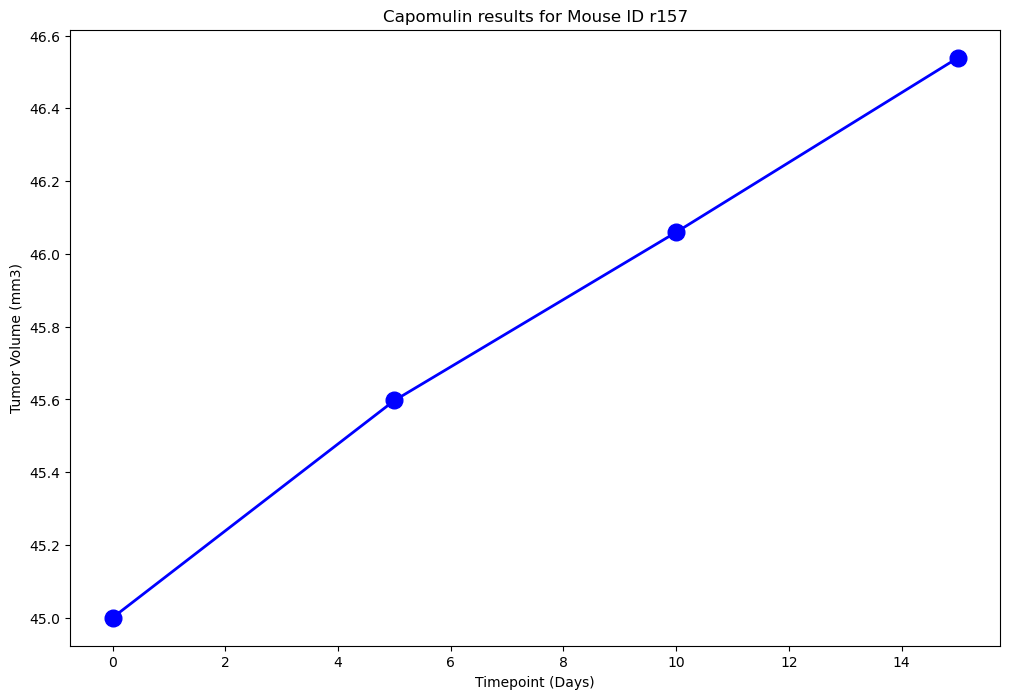

In [194]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

capomulin_df = combined_df.loc[combined_df["Drug Regimen"] == "Capomulin",:]
mouce_in_capomulin = capomulin_df.loc[capomulin_df["Mouse ID"] == "r157",:]
mouce_in_capomulin

# Specify plot parameters
x_axis = mouce_in_capomulin["Timepoint"]
tumor_volume = mouce_in_capomulin["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize=(12, 8))
plt.title("Capomulin results for Mouse ID r157")
plt.plot(x_axis, tumor_volume,linewidth=2, markersize=12, marker="o", color="blue", label="mm3")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")

#plt.savefig("./Images/mouse_Capomulin_line_plot.png", bbox_inches = "tight")
plt.show()


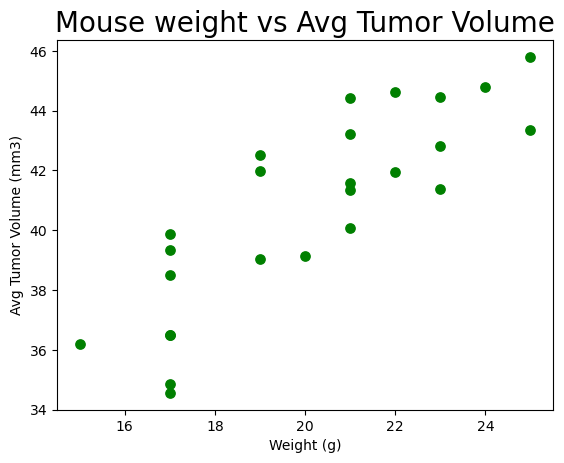

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.7
b742,7.0,21.0,22.5,40.083699,0.0
f966,16.0,17.0,10.0,36.505973,0.0
g288,3.0,19.0,22.5,41.990097,0.8
g316,22.0,22.0,22.5,44.613344,1.0


In [195]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_capom_df = capomulin_df.groupby(['Mouse ID']).mean()
fig1, ax1 = plt.subplots()
marker_size=14
plt.scatter(avg_capom_df['Weight (g)'],avg_capom_df['Tumor Volume (mm3)'],s=45, color="green")
plt.title("Mouse weight vs Avg Tumor Volume",fontsize =20)
plt.xlabel("Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")

#plt.savefig("./Images/avg_tumor_vol_scatterplot.png", bbox_inches = "tight")
plt.show()

avg_capom_df.head()


## Correlation and Regression

The correlation between mouse weight and average tumor volume is: 0.84


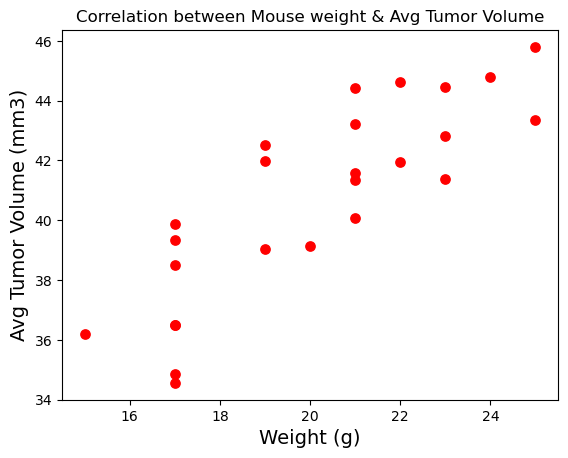

In [196]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = round(st.pearsonr(avg_capom_df['Weight (g)'],avg_capom_df['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is: {correlation}")

fig1, ax1 = plt.subplots()
plt.scatter(avg_capom_df['Weight (g)'],avg_capom_df['Tumor Volume (mm3)'],s=45, color="red")
plt.title("Correlation between Mouse weight & Avg Tumor Volume")
plt.xlabel("Weight (g)", fontsize = 14)
plt.ylabel("Avg Tumor Volume (mm3)", fontsize = 14)

# plt.savefig("./Images/corr_scatterplot.png", bbox_inches = "tight")
plt.show()


y = 0.95x + 21.55


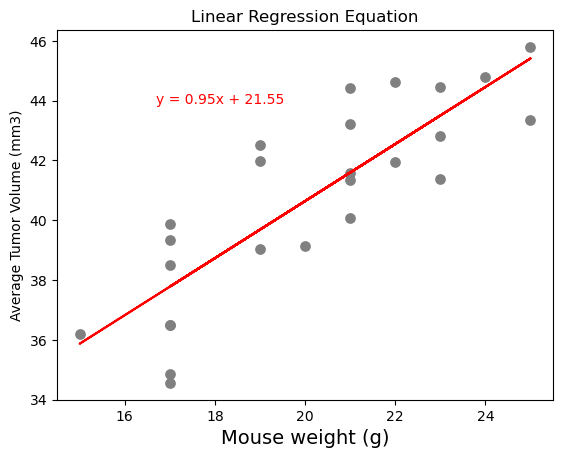

In [200]:
x_values = avg_capom_df['Weight (g)']
y_values = avg_capom_df['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

fig1, ax1 = plt.subplots()
plt.scatter(x_values,y_values, s=45, color="grey")
plt.plot(x_values,regress_values,"r-")
plt.title("Linear Regression Equation")
plt.xlabel("Mouse weight (g)", fontsize =14)
plt.ylabel("Average Tumor Volume (mm3)")
plt.annotate(line_eq, xy=(20,40), xycoords="data",xytext=(0.2, 0.80), textcoords="axes fraction", color="red")

#plt.savefig("./Images/corr_avg_tumor_vol_and_weight_scatterplot.png", bbox_inches = "tight")
plt.show()